# 1. Youtube 구독자 랭킹 크롤링

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [2]:
ser = Service('../../chromedriver/chromedriver.exe')
driver = webdriver.Chrome(service = ser)
url = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube'
driver.get(url)

In [3]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
songs = soup.select('form > table > tbody > tr')

songs_data = []
for song in songs:
    rank = song.select('td.rank')[0].text.strip()
    category = song.select('td > h1 > p.category')[0].text.strip()
    artist = song.select('td.subject > h1 > a')[0].text.strip()
    subscribers = song.select('td.subscriber_cnt')[0].text
    view = song.select('td.view_cnt')[0].text
    videos = song.select('td.video_cnt')[0].text
    
    songs_data.append([rank, category, artist, subscribers, view, videos])

In [4]:
songs_data

[['1', '[음악/댄스/가수]', 'BLACKPINK', '7130만', '220억2860만', '395개'],
 ['2', '[음악/댄스/가수]', 'HYBE LABELS', '6360만', '210억1371만', '786개'],
 ['3', '[음악/댄스/가수]', 'BANGTANTV', '6290만', '146억8130만', '1,665개'],
 ['4', '[음악/댄스/가수]', 'SMTOWN', '2970만', '234억3321만', '3,841개'],
 ['5',
  '[키즈/어린이]',
  'Boram Tube Vlog [보람튜브 브이로그]',
  '2650만',
  '110억5288만',
  '223개'],
 ['6', '[음악/댄스/가수]', '1MILLION Dance Studio', '2470만', '70억0543만', '3,517개'],
 ['7', '[음악/댄스/가수]', '1theK (원더케이)', '2380만', '215억4518만', '15,835개'],
 ['8', '[음악/댄스/가수]', 'JYP Entertainment', '2340만', '153억5057만', '1,435개'],
 ['9', '[음악/댄스/가수]', 'Mnet K-POP', '1920만', '142억1584만', '27,027개'],
 ['11', '[TV/방송]', 'KBS WORLD TV', '1740만', '130억6970만', '54,764개'],
 ['10', '[음악/댄스/가수]', 'JFlaMusic', '1740만', '35억3017만', '282개'],
 ['12', '[음식/요리/레시피]', 'Jane ASMR 제인', '1580만', '56억9872만', '1,338개'],
 ['13', '[음악/댄스/가수]', 'officialpsy', '1540만', '89억1662만', '91개'],
 ['14', '[음악/댄스/가수]', 'BIGBANG', '1400만', '68억8615만', '773개'],
 ['15', '[음악/댄스/가수]

In [6]:
df_songs_data = pd.DataFrame(songs_data, columns = ['rank', 'category', 'singer', 'subscriber', 'viewer', 'videos'])
df_songs_data.to_excel('./files/youtube_rank_prac.xlsx', index=None)

# 2. 데이터 시각화

## 2.1 데이터 전처리

In [7]:
# 한글폰트설정
from matplotlib import rc, font_manager
path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family= font_name)

In [14]:
df = pd.read_excel('./files/youtube_rank_prac.xlsx')
df.head()

,rank,category,singer,subscriber,viewer,videos
0,1,[음악/댄스/가수],BLACKPINK,7130만,220억2860만,395개
1,2,[음악/댄스/가수],HYBE LABELS,6360만,210억1371만,786개
2,3,[음악/댄스/가수],BANGTANTV,6290만,146억8130만,"1,665개"
3,4,[음악/댄스/가수],SMTOWN,2970만,234억3321만,"3,841개"
4,5,[키즈/어린이],Boram Tube Vlog [보람튜브 브이로그],2650만,110억5288만,223개


In [15]:
df.category.value_counts()

[음악/댄스/가수]     37
[키즈/어린이]       22
[음식/요리/레시피]    14
[TV/방송]        13
[뉴스/정치/사회]      3
[BJ/인물/연예인]     3
[애완/반려동물]       2
[해외]            1
[미분류]           1
[회사/오피셜]        1
[패션/미용]         1
[게임]            1
[취미/라이프]        1
Name: category, dtype: int64

In [16]:
df.subscriber.head()

0    7130만
1    6360만
2    6290만
3    2970만
4    2650만
Name: subscriber, dtype: object

In [17]:
df['replaced_subscriber'] = df.subscriber.str.replace('만', '0000').astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   rank                 100 non-null    int64 
 1   category             100 non-null    object
 2   singer               100 non-null    object
 3   subscriber           100 non-null    object
 4   viewer               100 non-null    object
 5   videos               100 non-null    object
 6   replaced_subscriber  100 non-null    int32 
dtypes: int32(1), int64(1), object(5)
memory usage: 5.2+ KB


In [19]:
df.head()

,rank,category,singer,subscriber,viewer,videos,replaced_subscriber
0,1,[음악/댄스/가수],BLACKPINK,7130만,220억2860만,395개,71300000
1,2,[음악/댄스/가수],HYBE LABELS,6360만,210억1371만,786개,63600000
2,3,[음악/댄스/가수],BANGTANTV,6290만,146억8130만,"1,665개",62900000
3,4,[음악/댄스/가수],SMTOWN,2970만,234억3321만,"3,841개",29700000
4,5,[키즈/어린이],Boram Tube Vlog [보람튜브 브이로그],2650만,110억5288만,223개,26500000


In [48]:
# pivot 생성
pivot_df = df.pivot_table(values='replaced_subscriber', 
                          index = 'category', aggfunc=['sum','count'])
# column 재설정
pivot_df.columns = ['subscriber_sum','subscriber_count']
# index reset. 기존 index 컬럼화
pivot_df.reset_index(inplace=True)
# 내림차순 정렬 : ascending = False
pivot_df.sort_values(by='subscriber_sum', ascending = False, inplace=True)
# 인덱스 재정렬
pivot_df.reset_index(drop=True, inplace=True)
pivot_df

,category,subscriber_sum,subscriber_count
0,[음악/댄스/가수],535880000,37
1,[키즈/어린이],163730000,22
2,[음식/요리/레시피],92900000,14
3,[TV/방송],87520000,13
4,[뉴스/정치/사회],20430000,3
5,[BJ/인물/연예인],13570000,3
6,[애완/반려동물],8080000,2
7,[해외],7810000,1
8,[미분류],6550000,1
9,[회사/오피셜],5950000,1


## Pie 차트 생성

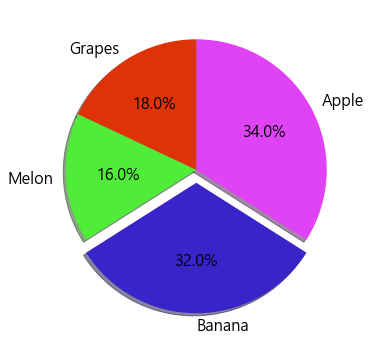

In [72]:
# 예시
import matplotlib.pyplot as plt

# ref
plt.rcParams['font.size'] =  16
ratio = [34, 32, 16, 18]
labels = ['Apple', 'Banana', 'Melon', 'Grapes']
explodes = [0, 0.1, 0, 0]
colors = ['#e042f5', '#3a24c9', '#4fed37', '#de3207']

# plot
plt.figure(figsize = (6, 6))
plt.pie(ratio, labels = labels, 
       autopct = '%.1f%%', counterclock= False,
       startangle= 90, explode = explodes, shadow = True,
       colors = colors)
plt.show()

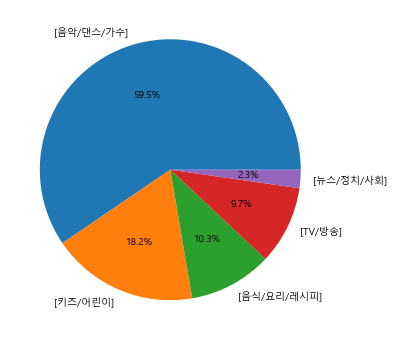

In [71]:
# Youtube chart
_ = pivot_df.head()
plt.rcParams['font.size'] = 10
plt.figure(figsize=(6,6))
plt.pie(_['subscriber_sum'], labels = _['category'], autopct='%.1f%%')
plt.show()